### ACKNOWLEGMENT

projek ini menggunakna data dari movielens.movielens merupakan sebuah grup peneliti yang menyediakan data set mengenai movie yang gratis dengan tujuan sebagai alat belajar dan penelitian

link : https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

# Data Understanding

## Data Loading
dalam tahap ini , data akan di unduh dengan menggunakan link di bawah .setelah di di unduh , data akan di lihat setiap feature dan mencoba untuk memahami setiap file yang ada

In [1]:
# mengunduh datset
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2023-09-22 23:40:50--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  4.84MB/s    in 0.2s    

2023-09-22 23:40:50 (4.84 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [2]:
# membuka file dari bentuk ZIP menjadi bentuk CSV
!unzip /content/ml-latest-small.zip

Archive:  /content/ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


## Explanatory Data

In [4]:
# mengimport data dan menentukan variable setiap file
import pandas as pd
film = pd.read_csv('/content/ml-latest-small/movies.csv')
rating =pd.read_csv('/content/ml-latest-small/ratings.csv')
tag =pd.read_csv ('/content/ml-latest-small/tags.csv')
link = pd.read_csv('/content/ml-latest-small/links.csv')


In [5]:
# info mengenai data set dari Film
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
# info mengenai data set dari rating
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
# info mengenai data set dari tag
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [8]:
# info mengenai data set dari link
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [9]:
print('jumlah film yang ada pada dataset adalah :',len (film.movieId.unique()))
print ('jumlah tag yang ada pada dataset ini adalah : ',len(tag.userId.unique()))
print('jumlah user yang memberikan rating :',len(rating.userId.unique()))
print('jumah link  yang ada pada datsaset ini adalah',len(link.movieId.unique()))



jumlah film yang ada pada dataset adalah : 9742
jumlah tag yang ada pada dataset ini adalah :  58
jumlah user yang memberikan rating : 610
jumah link  yang ada pada datsaset ini adalah 9742


dari informasi diatas jumlah data cukup untuk di olah menjadi sistem rekomendasi dengan jumlah film berjumlah 9742 film.

# Data Preprocessing
## Menggabungkan semua film

In [10]:
import numpy as np

# Menggabungkan seluruh movie_Id
movie_Id = np.concatenate((
    film.movieId.unique(),
    link.movieId.unique(),
    tag.movieId.unique()
))

# Mengurutkan data dan menghapus data yang sama
movie_Id = np.sort(np.unique(movie_Id))

print('Jumlah seluruh data movie Id yang ada adalah : ', len(movie_Id))

Jumlah seluruh data movie Id yang ada adalah :  9742


In [11]:
movie_Id

array([     1,      2,      3, ..., 193585, 193587, 193609])

## Menggabungkan Seluruh User

In [12]:
# Menggabungkan seluruh user_Id
user_Id = np.concatenate((
    tag.userId.unique(),
    rating.userId.unique()

)) ,
# mengurutkan data dan menghapus data yang sama
user_Id = np.sort(np.unique(user_Id))
print('jumlah data set yang memiliki user Id adalah : ',len(user_Id))

jumlah data set yang memiliki user Id adalah :  610


In [13]:
user_Id

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

seperti yang terlihat bahwa tittle memiliki tahun rilis , untuk mengurangi eror di karenakan terdapat angka dan huruf pada satu cell, sebaiknya di pisah dengan tahapan di bawah

In [14]:
# membuat satu feature baru untuk tahun rilis film agar informasi tidak hilang ketika kita membersihkan fitur title
film['tahun_rilis'] = film.title.str.extract('([0-9]{4})')
film.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres tahun_rilis  
0  Adventure|Animation|Children|Comedy|Fantasy        1995  
1                   Adventure|Children|Fantasy        1995  
2                               Comedy|Romance        1995  
3                         Comedy|Drama|Romance        1995  
4                                       Comedy        1995

In [15]:
# ubah  column menjadi string
film['title'] = film['title'].astype(str)

#hapus keterangan tahun pada  fitur titte
film['title'] = film['title'].str.split('(', 1).str[0].str.strip()
film.head()

<ipython-input-15-fcabd0b77169>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  film['title'] = film['title'].str.split('(', 1).str[0].str.strip()


movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                        genres tahun_rilis  
0  Adventure|Animation|Children|Comedy|Fantasy        1995  
1                   Adventure|Children|Fantasy        1995  
2                               Comedy|Romance        1995  
3                         Comedy|Drama|Romance        1995  
4                                       Comedy        1995

In [16]:
# gabungkan file film dengan file rating
films = pd.merge(film, rating, on='movieId', how='left')
# mengecek apakah sudah rapi ata belum
films


movieId                               title  \
0             1                           Toy Story   
1             1                           Toy Story   
2             1                           Toy Story   
3             1                           Toy Story   
4             1                           Toy Story   
...         ...                                 ...   
100849   193581  Black Butler: Book of the Atlantic   
100850   193583               No Game No Life: Zero   
100851   193585                               Flint   
100852   193587        Bungo Stray Dogs: Dead Apple   
100853   193609        Andrew Dice Clay: Dice Rules   

                                             genres tahun_rilis  userId  \
0       Adventure|Animation|Children|Comedy|Fantasy        1995     1.0   
1       Adventure|Animation|Children|Comedy|Fantasy        1995     5.0   
2       Adventure|Animation|Children|Comedy|Fantasy        1995     7.0   
3       Adventure|Animation|Children|Comedy|Fantasy        1995    15.0   
4       Adventure|Animation|Children|Comedy|Fantasy        1995    17.0   
...                                             ...         ...     ...   
100849              Action|Animation|Comedy|Fantasy        2017   184.0   
100850                     Animation|Comedy|Fantasy        2017   184.0   
100851                                        Drama        2017   184.0   
100852                             Action|Animation        2018   184.0   
100853                                       Comedy        1991   331.0   

        rating     timestamp  
0          4.0  9.649827e+08  
1          4.0  8.474350e+08  
2          4.5  1.106636e+09  
3          2.5  1.510578e+09  
4          4.5  1.305696e+09  
...        ...           ...  
100849     4.0  1.537109e+09  
100850     3.5  1.537110e+09  
100851     3.5  1.537110e+09  
100852     3.5  1.537110e+09  
100853     4.0  1.537158e+09  

[100854 rows x 7 columns]

In [17]:
# mencek nilai rating  dan skalanya
films.rating.unique()

array([4. , 4.5, 2.5, 3.5, 3. , 5. , 0.5, 2. , 1.5, 1. , nan])

terlihat nilainya tidak bulat sehingga bagusnya di ubah menjadi nilai bulat

In [18]:
# mengubah nilai rating memnjadi nilai bulat

films['rating'] = films['rating'].apply(np.ceil)
films.rating.unique()


array([ 4.,  5.,  3.,  1.,  2., nan])

In [19]:
# hasil mengubah nilai rating
films


movieId                               title  \
0             1                           Toy Story   
1             1                           Toy Story   
2             1                           Toy Story   
3             1                           Toy Story   
4             1                           Toy Story   
...         ...                                 ...   
100849   193581  Black Butler: Book of the Atlantic   
100850   193583               No Game No Life: Zero   
100851   193585                               Flint   
100852   193587        Bungo Stray Dogs: Dead Apple   
100853   193609        Andrew Dice Clay: Dice Rules   

                                             genres tahun_rilis  userId  \
0       Adventure|Animation|Children|Comedy|Fantasy        1995     1.0   
1       Adventure|Animation|Children|Comedy|Fantasy        1995     5.0   
2       Adventure|Animation|Children|Comedy|Fantasy        1995     7.0   
3       Adventure|Animation|Children|Comedy|Fantasy        1995    15.0   
4       Adventure|Animation|Children|Comedy|Fantasy        1995    17.0   
...                                             ...         ...     ...   
100849              Action|Animation|Comedy|Fantasy        2017   184.0   
100850                     Animation|Comedy|Fantasy        2017   184.0   
100851                                        Drama        2017   184.0   
100852                             Action|Animation        2018   184.0   
100853                                       Comedy        1991   331.0   

        rating     timestamp  
0          4.0  9.649827e+08  
1          4.0  8.474350e+08  
2          5.0  1.106636e+09  
3          3.0  1.510578e+09  
4          5.0  1.305696e+09  
...        ...           ...  
100849     4.0  1.537109e+09  
100850     4.0  1.537110e+09  
100851     4.0  1.537110e+09  
100852     4.0  1.537110e+09  
100853     4.0  1.537158e+09  

[100854 rows x 7 columns]

dari atas terlihat bagian yang masih sulit dipahami adalah bagian timestamp yang mana dapat dirapikan dengan menggunakan code di bawah

In [20]:
#perbaiki timestamp
import datetime

films.timestamp = pd.to_datetime(films['timestamp'], unit='s')
films.head()

movieId      title                                       genres  \
0        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy   

  tahun_rilis  userId  rating           timestamp  
0        1995     1.0     4.0 2000-07-30 18:45:03  
1        1995     5.0     4.0 1996-11-08 06:36:02  
2        1995     7.0     5.0 2005-01-25 06:52:26  
3        1995    15.0     3.0 2017-11-13 12:59:30  
4        1995    17.0     5.0 2011-05-18 05:28:03

In [49]:
#mencek apakah nilai kosong
films.isnull().sum()

movieId         0
title           0
genres          0
tahun_rilis    17
userId         18
rating         18
timestamp      18
dtype: int64

setelah melihat nilai yang kosong sangat sedikit jika di bandingkan dengan  jumlah data yang kita miliki, pilihan paling effisien adalah pilihan untuk menghapus data tersebut seperti yang di lakukan di bawah

In [22]:
# menghapus baris yang memiliki nilai kosong
film_clean = films.dropna()
film_clean

movieId                               title  \
0             1                           Toy Story   
1             1                           Toy Story   
2             1                           Toy Story   
3             1                           Toy Story   
4             1                           Toy Story   
...         ...                                 ...   
100849   193581  Black Butler: Book of the Atlantic   
100850   193583               No Game No Life: Zero   
100851   193585                               Flint   
100852   193587        Bungo Stray Dogs: Dead Apple   
100853   193609        Andrew Dice Clay: Dice Rules   

                                             genres tahun_rilis  userId  \
0       Adventure|Animation|Children|Comedy|Fantasy        1995     1.0   
1       Adventure|Animation|Children|Comedy|Fantasy        1995     5.0   
2       Adventure|Animation|Children|Comedy|Fantasy        1995     7.0   
3       Adventure|Animation|Children|Comedy|Fantasy        1995    15.0   
4       Adventure|Animation|Children|Comedy|Fantasy        1995    17.0   
...                                             ...         ...     ...   
100849              Action|Animation|Comedy|Fantasy        2017   184.0   
100850                     Animation|Comedy|Fantasy        2017   184.0   
100851                                        Drama        2017   184.0   
100852                             Action|Animation        2018   184.0   
100853                                       Comedy        1991   331.0   

        rating           timestamp  
0          4.0 2000-07-30 18:45:03  
1          4.0 1996-11-08 06:36:02  
2          5.0 2005-01-25 06:52:26  
3          3.0 2017-11-13 12:59:30  
4          5.0 2011-05-18 05:28:03  
...        ...                 ...  
100849     4.0 2018-09-16 14:44:42  
100850     4.0 2018-09-16 14:52:25  
100851     4.0 2018-09-16 14:56:45  
100852     4.0 2018-09-16 15:00:21  
100853     4.0 2018-09-17 04:13:26  

[100819 rows x 7 columns]

In [23]:
# mencek kembali hasil pembersihan
film_clean.isnull().sum()

movieId        0
title          0
genres         0
tahun_rilis    0
userId         0
rating         0
timestamp      0
dtype: int64

In [24]:
# Mengurutkan film berdasarkan movie_ id kemudian memasukkannya ke dalam variabel film_fix
film_fix = film_clean.sort_values('movieId', ascending=True)
film_fix

movieId                               title  \
0             1                           Toy Story   
137           1                           Toy Story   
138           1                           Toy Story   
139           1                           Toy Story   
140           1                           Toy Story   
...         ...                                 ...   
100849   193581  Black Butler: Book of the Atlantic   
100850   193583               No Game No Life: Zero   
100851   193585                               Flint   
100852   193587        Bungo Stray Dogs: Dead Apple   
100853   193609        Andrew Dice Clay: Dice Rules   

                                             genres tahun_rilis  userId  \
0       Adventure|Animation|Children|Comedy|Fantasy        1995     1.0   
137     Adventure|Animation|Children|Comedy|Fantasy        1995   382.0   
138     Adventure|Animation|Children|Comedy|Fantasy        1995   385.0   
139     Adventure|Animation|Children|Comedy|Fantasy        1995   389.0   
140     Adventure|Animation|Children|Comedy|Fantasy        1995   391.0   
...                                             ...         ...     ...   
100849              Action|Animation|Comedy|Fantasy        2017   184.0   
100850                     Animation|Comedy|Fantasy        2017   184.0   
100851                                        Drama        2017   184.0   
100852                             Action|Animation        2018   184.0   
100853                                       Comedy        1991   331.0   

        rating           timestamp  
0          4.0 2000-07-30 18:45:03  
137        5.0 2018-01-05 14:30:28  
138        4.0 1996-06-13 18:47:22  
139        5.0 1997-03-09 19:02:54  
140        3.0 2002-09-18 22:27:57  
...        ...                 ...  
100849     4.0 2018-09-16 14:44:42  
100850     4.0 2018-09-16 14:52:25  
100851     4.0 2018-09-16 14:56:45  
100852     4.0 2018-09-16 15:00:21  
100853     4.0 2018-09-17 04:13:26  

[100819 rows x 7 columns]

In [25]:
#melihat jumlah film setelah di lakukukan pembersihan

len(film_fix.movieId.unique())

9712

In [26]:
#menampilkan genre yang terdapat datset ini
import sys
np.set_printoptions(threshold=sys.maxsize)
film_fix.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

setelah di cek ternyata ada film yang tidak memiliki genre, hal ini tentu akan menjadi masalah di masa depan jika tidak kita tangani , untuk menangani mendrop film yang tak memilik genre , dengan menggunakan code di bawah

In [27]:
#menampilan  daftar film dengan  no genre listed
film_fix[film_fix['genres']=='(no genres listed)']

movieId                                              title  \
97505    114335                                         La cravate   
98200    122888                                            Ben-hur   
98239    122896   Pirates of the Caribbean: Dead Men Tell No Tales   
98238    122896   Pirates of the Caribbean: Dead Men Tell No Tales   
98237    122896   Pirates of the Caribbean: Dead Men Tell No Tales   
98240    122896   Pirates of the Caribbean: Dead Men Tell No Tales   
98235    122896   Pirates of the Caribbean: Dead Men Tell No Tales   
98234    122896   Pirates of the Caribbean: Dead Men Tell No Tales   
98236    122896   Pirates of the Caribbean: Dead Men Tell No Tales   
98626    129250                                         Superfast!   
98736    132084                                       Let It Be Me   
98950    134861                      Trevor Noah: African American   
99349    141131                                          Guardians   
99375    141866                                         Green Room   
99376    141866                                         Green Room   
99377    141866                                         Green Room   
99410    142456                            The Brand New Testament   
99409    142456                            The Brand New Testament   
99634    149330                                 A Cosmic Christmas   
99711    152037                                        Grease Live   
99710    152037                                        Grease Live   
99800    155589                                    Noin 7 veljestä   
99935    159161                               Ali Wong: Baby Cobra   
99948    159779                          A Midsummer Night's Dream   
100023   161008                                The Forbidden Dance   
100177   165489                                     Ethel & Ernest   
100198   166024                                           Whiplash   
100199   166024                                           Whiplash   
100385   169034                                           Lemonade   
100449   171749                              Death Note: Desu nôto   
100476   172497                         T2 3-D: Battle Across Time   
100484   172591                   The Godfather Trilogy: 1972-1990   
100485   172591                   The Godfather Trilogy: 1972-1990   
100513   173535  The Adventures of Sherlock Holmes and Doctor W...   
100540   174403                               The Putin Interviews   
100731   181413  Too Funny to Fail: The Life and Death of The D...   
100733   181719  Serving in Silence: The Margarethe Cammermeyer...   
100741   182727                            A Christmas Story Live!   

                    genres tahun_rilis  userId  rating           timestamp  
97505   (no genres listed)        1957    50.0     3.0 2018-03-30 21:47:23  
98200   (no genres listed)        2016   567.0     1.0 2018-05-02 19:38:44  
98239   (no genres listed)        2017   252.0     3.0 2017-06-24 06:01:10  
98238   (no genres listed)        2017   248.0     4.0 2018-08-18 11:34:18  
98237   (no genres listed)        2017   212.0     4.0 2018-06-08 17:40:17  
98240   (no genres listed)        2017   586.0     5.0 2018-06-25 04:06:27  
98235   (no genres listed)        2017    62.0     4.0 2018-04-06 20:52:35  
98234   (no genres listed)        2017    21.0     4.0 2016-01-06 03:49:23  
98236   (no genres listed)        2017   111.0     4.0 2018-01-17 01:32:16  
98626   (no genres listed)        2015   448.0     1.0 2015-11-18 17:48:50  
98736   (no genres listed)        1995   599.0     3.0 2018-02-20 16:05:05  
98950   (no genres listed)        2013   111.0     3.0 2018-01-17 02:08:20  
99349   (no genres listed)        2016   596.0     3.0 2018-08-31 10:41:07  
99375   (no genres listed)        2015   560.0     4.0 2016-07-27 21:03:51  
99376   (no genres listed)        2015   567.0     3.0 2018-05-02 18:47:22  
99377   (no genres listed)        2015   599.

In [28]:
# mendrop / menghapus film yang memiliki keterangan genre no genres listed
film = films[films['genres']!='(no genres listed)']
film

movieId                               title  \
0             1                           Toy Story   
1             1                           Toy Story   
2             1                           Toy Story   
3             1                           Toy Story   
4             1                           Toy Story   
...         ...                                 ...   
100849   193581  Black Butler: Book of the Atlantic   
100850   193583               No Game No Life: Zero   
100851   193585                               Flint   
100852   193587        Bungo Stray Dogs: Dead Apple   
100853   193609        Andrew Dice Clay: Dice Rules   

                                             genres tahun_rilis  userId  \
0       Adventure|Animation|Children|Comedy|Fantasy        1995     1.0   
1       Adventure|Animation|Children|Comedy|Fantasy        1995     5.0   
2       Adventure|Animation|Children|Comedy|Fantasy        1995     7.0   
3       Adventure|Animation|Children|Comedy|Fantasy        1995    15.0   
4       Adventure|Animation|Children|Comedy|Fantasy        1995    17.0   
...                                             ...         ...     ...   
100849              Action|Animation|Comedy|Fantasy        2017   184.0   
100850                     Animation|Comedy|Fantasy        2017   184.0   
100851                                        Drama        2017   184.0   
100852                             Action|Animation        2018   184.0   
100853                                       Comedy        1991   331.0   

        rating           timestamp  
0          4.0 2000-07-30 18:45:03  
1          4.0 1996-11-08 06:36:02  
2          5.0 2005-01-25 06:52:26  
3          3.0 2017-11-13 12:59:30  
4          5.0 2011-05-18 05:28:03  
...        ...                 ...  
100849     4.0 2018-09-16 14:44:42  
100850     4.0 2018-09-16 14:52:25  
100851     4.0 2018-09-16 14:56:45  
100852     4.0 2018-09-16 15:00:21  
100853     4.0 2018-09-17 04:13:26  

[100807 rows x 7 columns]

In [29]:
# mengubah nama variable dan mengurutkan berdasarkan movie_Id kembali
preparation = film
preparation.sort_values('movieId')


movieId                               title  \
0             1                           Toy Story   
137           1                           Toy Story   
138           1                           Toy Story   
139           1                           Toy Story   
140           1                           Toy Story   
...         ...                                 ...   
100849   193581  Black Butler: Book of the Atlantic   
100850   193583               No Game No Life: Zero   
100851   193585                               Flint   
100852   193587        Bungo Stray Dogs: Dead Apple   
100853   193609        Andrew Dice Clay: Dice Rules   

                                             genres tahun_rilis  userId  \
0       Adventure|Animation|Children|Comedy|Fantasy        1995     1.0   
137     Adventure|Animation|Children|Comedy|Fantasy        1995   382.0   
138     Adventure|Animation|Children|Comedy|Fantasy        1995   385.0   
139     Adventure|Animation|Children|Comedy|Fantasy        1995   389.0   
140     Adventure|Animation|Children|Comedy|Fantasy        1995   391.0   
...                                             ...         ...     ...   
100849              Action|Animation|Comedy|Fantasy        2017   184.0   
100850                     Animation|Comedy|Fantasy        2017   184.0   
100851                                        Drama        2017   184.0   
100852                             Action|Animation        2018   184.0   
100853                                       Comedy        1991   331.0   

        rating           timestamp  
0          4.0 2000-07-30 18:45:03  
137        5.0 2018-01-05 14:30:28  
138        4.0 1996-06-13 18:47:22  
139        5.0 1997-03-09 19:02:54  
140        3.0 2002-09-18 22:27:57  
...        ...                 ...  
100849     4.0 2018-09-16 14:44:42  
100850     4.0 2018-09-16 14:52:25  
100851     4.0 2018-09-16 14:56:45  
100852     4.0 2018-09-16 15:00:21  
100853     4.0 2018-09-17 04:13:26  

[100807 rows x 7 columns]

In [30]:
#menghapus duplikat film berdasarkan Movie_ id dengan tujuan membuat model  lebih bersih dan ringan
preparation = preparation.drop_duplicates('movieId')
preparation

movieId                               title  \
0             1                           Toy Story   
215           2                             Jumanji   
325           3                    Grumpier Old Men   
377           4                   Waiting to Exhale   
384           5         Father of the Bride Part II   
...         ...                                 ...   
100849   193581  Black Butler: Book of the Atlantic   
100850   193583               No Game No Life: Zero   
100851   193585                               Flint   
100852   193587        Bungo Stray Dogs: Dead Apple   
100853   193609        Andrew Dice Clay: Dice Rules   

                                             genres tahun_rilis  userId  \
0       Adventure|Animation|Children|Comedy|Fantasy        1995     1.0   
215                      Adventure|Children|Fantasy        1995     6.0   
325                                  Comedy|Romance        1995     1.0   
377                            Comedy|Drama|Romance        1995     6.0   
384                                          Comedy        1995     6.0   
...                                             ...         ...     ...   
100849              Action|Animation|Comedy|Fantasy        2017   184.0   
100850                     Animation|Comedy|Fantasy        2017   184.0   
100851                                        Drama        2017   184.0   
100852                             Action|Animation        2018   184.0   
100853                                       Comedy        1991   331.0   

        rating           timestamp  
0          4.0 2000-07-30 18:45:03  
215        4.0 1996-10-17 11:58:42  
325        4.0 2000-07-30 18:20:47  
377        3.0 1996-10-17 12:12:29  
384        5.0 1996-10-17 12:05:38  
...        ...                 ...  
100849     4.0 2018-09-16 14:44:42  
100850     4.0 2018-09-16 14:52:25  
100851     4.0 2018-09-16 14:56:45  
100852     4.0 2018-09-16 15:00:21  
100853     4.0 2018-09-17 04:13:26  

[9708 rows x 7 columns]

In [31]:
# hasil dari peroses sebelumnya
print('jumlah data yang dimiliki setelah di peroses : ', len(preparation))

jumlah data yang dimiliki setelah di peroses :  9708


In [32]:
#mengubah movie id menjadi to list
movieId= preparation['movieId'].tolist()

# menubah title menjadi dalam bentuk tolist
title =preparation['title'].tolist()

# mengubah genre menjadi dalam bentuk to list

genre = preparation ['genres'].tolist()

# mengubah tahun rilis menjadi bentuk tolist

tahun_rilis = preparation ['tahun_rilis'].tolist()

In [33]:
# membuat data drame baru dengan menggunkan variable di bawah
saringan =  pd.DataFrame({
    'id': movieId,
    'judul': title,
    'genre': genre,

})
saringan

id                               judul  \
0          1                           Toy Story   
1          2                             Jumanji   
2          3                    Grumpier Old Men   
3          4                   Waiting to Exhale   
4          5         Father of the Bride Part II   
...      ...                                 ...   
9703  193581  Black Butler: Book of the Atlantic   
9704  193583               No Game No Life: Zero   
9705  193585                               Flint   
9706  193587        Bungo Stray Dogs: Dead Apple   
9707  193609        Andrew Dice Clay: Dice Rules   

                                            genre  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
9703              Action|Animation|Comedy|Fantasy  
9704                     Animation|Comedy|Fantasy  
9705                                        Drama  
9706                             Action|Animation  
9707                                       Comedy  

[9708 rows x 3 columns]

setelah berbagai peroses pengolahan , mendapatkan hasil 9708 data . data ini siap untuk diolah menjadi model rekomendasi yang akan di kembangkan.

## Model Development dengan Content Based Filtering

In [34]:
# membuat nama variable baru untuk model ini , agar variable saringan tak terganggu dan dapat digunakan lagi
data = saringan
data.sample(5)

id                 judul                             genre
4385  6429        Winchester '73                           Western
1218  1617     L.A. Confidential  Crime|Film-Noir|Mystery|Thriller
2772  3710        Action Jackson      Action|Comedy|Crime|Thriller
158    187            Party Girl                            Comedy
3087  4144  In the Mood For Love                     Drama|Romance

### TF-IDF Vectorizer

proses term frequency-inverse document frequency (TF-IDF) untuk mencari kata yang penting dalam kolom genre. setelah melakukan perhitungan idf akan didapatkan index. kemudian, saya akan mencoba melakukan mapping untuk menampilkan data genre-nya.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(data['genre'])

# Mapping array dari fitur index integer ke fitur genre
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war',
       'western'], dtype=object)

In [36]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9708, 21)

hasil yang di dapatkan adalah 9708 dataset dan 21 genre  dalam model kali ini

In [37]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.4168036 , 0.51628768, 0.50489573, 0.26738778,
         0.        , 0.        , 0.        , 0.48301747, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.51229321, 0.        , 0.62056723, 0.        ,
         0.        , 0.        , 0.        , 0.59367667, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.57070525,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.82115499, 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.50488626,
         0.        , 0.        , 0.46

In [38]:
## menampilkan bentuk matrix untuk menujukan korelasi film dengan genrenya
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.judul
).sample(20, axis=1).sample(10, axis=0)

thriller  horror  children  \
judul                                                                          
Bustin' Loose                                      0.00000     0.0  0.000000   
Operation Dumbo Drop                               0.00000     0.0  0.000000   
The Boss Baby                                      0.00000     0.0  0.655671   
Manhattan Project, The                             0.46261     0.0  0.000000   
Someone Like You                                   0.00000     0.0  0.000000   
Wallace & Gromit in The Curse of the Were-Rabbit   0.00000     0.0  0.576621   
The Death of Stalin                                0.00000     0.0  0.000000   
Love                                               0.00000     0.0  0.000000   
Zabriskie Point                                    0.00000     0.0  0.000000   
Ghost Dad                                          0.00000     0.0  0.000000   

                                                       war  western   romance  \
judul                                                                           
Bustin' Loose                                     0.000000      0.0  0.000000   
Operation Dumbo Drop                              0.685962      0.0  0.000000   
The Boss Baby                                     0.000000      0.0  0.000000   
Manhattan Project, The                            0.000000      0.0  0.000000   
Someone Like You                                  0.000000      0.0  0.821155   
Wallace & Gromit in The Curse of the Were-Rabbit  0.000000      0.0  0.000000   
The Death of Stalin                               0.000000      0.0  0.000000   
Love                                              0.000000      0.0  0.841594   
Zabriskie Point                                   0.000000      0.0  0.841594   
Ghost Dad                                         0.000000      0.0  0.000000   

                                                  adventure  imax    action  \
judul                                                                         
Bustin' Loose                                      0.000000   0.0  0.000000   
Operation Dumbo Drop                               0.492463   0.0  0.432583   
The Boss Baby                                      0.000000   0.0  0.000000   
Manhattan Project, The                             0.000000   0.0  0.000000   
Someone Like You                                   0.000000   0.0  0.000000   
Wallace & Gromit in The Curse of the Were-Rabbit   0.476015   0.0  0.000000   
The Death of Stalin                                0.000000   0.0  0.000000   
Love                                               0.000000   0.0  0.000000   
Zabriskie Point                                    0.000000   0.0  0.000000   
Ghost Dad                                          0.000000   0.0  0.000000   

                                                    comedy  animation  \
judul                                                                   
Bustin' Loose                                     1.000000   0.000000   
Operation Dumbo Drop                              0.315924   0.000000   
The Boss Baby                                     0.347237   0.670465   
Manhattan Project, The                            0.342401   0.000000   
Someone Like You                                  0.570705   0.000000   
Wallace & Gromit in The Curse of the Were-Rabbit  0.305373   0.589632   
The Death of Stalin                               1.000000   0.000000   
Love                                              0.000000   0.000000   
Zabriskie Point                                   0.000000   0.000000   
Ghost Dad                                         0.484320   0.000000   

                                                       sci  documentary  \
judul                                                                     
Bustin' Loose                                     0.000000          0.0   
Operation Dumbo Drop                              0.000000       

## Cosine Similarity

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

In [44]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul film
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['judul'], columns=data['judul'])
print('Shape:', cosine_sim_df.shape)

# show similarity matrix
cosine_sim_df.sample(20, axis=1).sample(20, axis=0)

Shape: (9708, 9708)


judul                               Iron Monkey  Oh, God! Book II  Boogeyman  \
judul                                                                          
Away from Her                          0.000000          0.000000   0.301343   
Taking Sides                           0.000000          0.000000   0.301343   
George Carlin: Jammin' in New York     0.589780          1.000000   0.000000   
Replacements, The                      0.589780          1.000000   0.000000   
Angel-A                                0.220010          0.373037   0.103802   
Phantasm II                            0.280654          0.000000   0.387720   
Kiss Me, Stupid                        0.589780          1.000000   0.000000   
Themroc                                0.300360          0.509274   0.474594   
Game Over, Man!                        1.000000          0.589780   0.000000   
W.                                     0.000000          0.000000   0.301343   
Cheech and Chong's Up in Smoke         0.589780          1.000000   0.000000   
Only the Strong                        0.807564          0.000000   0.000000   
Vibes                                  0.251480          0.426397   0.000000   
Lincoln                                0.000000          0.000000   0.117934   
Fun with Dick and Jane                 0.314638          0.533483   0.000000   
Metropolitan                           0.589780          1.000000   0.000000   
Noah                                   0.000000          0.000000   0.087304   
West Side Story                        0.000000          0.000000   0.098749   
Presto                                 0.173488          0.294157   0.000000   
Wind and the Lion, The                 0.000000          0.000000   0.000000   

judul                               Year of Living Dangerously, The  \
judul                                                                 
Away from Her                                              0.334134   
Taking Sides                                               0.334134   
George Carlin: Jammin' in New York                         0.000000   
Replacements, The                                          0.000000   
Angel-A                                                    0.394548   
Phantasm II                                                0.000000   
Kiss Me, Stupid                                            0.000000   
Themroc                                                    0.000000   
Game Over, Man!                                            0.000000   
W.                                                         0.334134   
Cheech and Chong's Up in Smoke                             0.000000   
Only the Strong                                            0.000000   
Vibes                                                      0.319423   
Lincoln                                                    0.853775   
Fun with Dick and Jane                                     0.000000   
Metropolitan                                               0.000000   
Noah                                                       0.096804   
West Side Story                                            0.375341   
Presto                                                     0.000000   
Wind and the Lion, The                                     0.000000   

judul                               Irreversible  Teaching Mrs. Tingle  \
judul                                                                    
Away from Her                           0.306985              0.000000   
Taking Sides                            0.306985              0.000000   
George Carlin: Jammin' in New York      0.000000              0.594921   
Replacements, The                       0.000000              0.594921   
Angel-A                                 0.105746              0.221928   
Phantasm II                             0.154025              0.275630   
Kiss Me, Stupid                         0.000000              0.594921   
Themroc   

## Mendapatkan Rekomendasi

membuat fungsi untuk menampilkan top 8 film yang bisa di rekomendasikan sesuai dengan genre

In [51]:
## membuat fungsi khusus untuk menampilkan rekomendasi film

def movie_recommendations(nama_film, similarity_data=cosine_sim_df, items=data[['judul', 'genre']], k=8):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_film : tipe data string (str)
                judul Film (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan film sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_film].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_film agar judul film  yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_film, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [52]:
#memastikan judul film ada dalam list rekomendasi
data[data.judul.eq('Oh, God! Book II')]


id             judul   genre
3743  5213  Oh, God! Book II  Comedy

In [53]:
# Mendapatkan rekomendasi restoran yang mirip dengan Oh, God! Book II
movie_recommendations('Oh, God! Book II')

judul   genre
0         Andrew Dice Clay: Dice Rules  Comedy
1                                 Made  Comedy
2        Carry On Don't Lose Your Head  Comedy
3                        Jack and Jill  Comedy
4  Dr. Goldfoot and the Bikini Machine  Comedy
5                  Broadway Danny Rose  Comedy
6                                Zelig  Comedy
7                         Big Business  Comedy

sistem menghasilkan yang sangat akurat jika berdasarkan genre, dari ke 8 rekomendasi ,semua memiliki hasil genre yang sama yaitu comedy.

# Model Development dengan Collaborative Filtering

In [54]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

### Data preparation


In [55]:
# mendekalarasikan variable baru dari file rating , dengan tujuan untuk  digunakan membuat sistem rekomendasi

dd = pd.read_csv('/content/ml-latest-small/ratings.csv')
"""
untuk menghemat waktu disini langsung saja kita menghapus nilai value yang kosong,
sehingga daat terlihat hasil di bawah  """

dd = dd.dropna()
dd.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

melihat hasil pengolahan dan masil terdapat nilai rating dan time stamp yang tak sesuai. di rating terdapat nilai tak bulat dan di timestamp format penulisan yang membingungkan,

In [56]:
dd

userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]

In [57]:
# membulatkan nilai rating
dd['rating'] = dd['rating'].apply(np.ceil)
dd

userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]

disini nilai time stamp dapat di ignore dikarenakan tidak akan di gunakan pada proses selanjutnya .
di tahap selanjutnya kita akan mepping User_ id dan rating.

In [58]:



# change unique values of 'userId' to list
user_ids = dd['userId'].unique().tolist()
print('list userID: ', user_ids)

# encode 'userId'
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# encoding index to 'userId'
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)


list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [59]:

# change unique values of 'movieId' to list
films_ids = dd['movieId'].unique().tolist()

# encode 'movieId'
films_to_films_encoded = {x: i for i, x in enumerate(films_ids)}

# encoding index to 'movieId'
films_encoded_to_films = {i: x for i, x in enumerate(films_ids)}

In [60]:
# Mapping 'userId' to dataframe
dd['user'] = dd['userId'].map(user_to_user_encoded)

# Mapping 'movieId' ke dataframe
dd['films'] = dd['movieId'].map(films_to_films_encoded)

In [61]:
# get number of users
num_users = len(user_to_user_encoded)
print(num_users)

# get number of films
num_films = len(films_encoded_to_films)
print(num_films)

# change dtype
dd['rating'] = dd['rating'].values.astype(np.float32)

# get min values of rating
min_rating = min(dd['rating'])

# get max values of rating
max_rating = max(dd['rating'])

print('Number of User: {}, Number of Films: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_films, min_rating, max_rating
))


610
9724
Number of User: 610, Number of Films: 9724, Min Rating: 1.0, Max Rating: 5.0


kita  akan membagi data set menjadi rasio 80 persen train dan 20 persen test , sebelumnya kiat akan mengacak data set kita sehingga penyebaran akan merata dan membuat model menghasilkan hasil yang lebih konsisten dan lebih baik.

In [ ]:
# Mengacak dataset

dd = dd.sample(frac=1, random_state=42)

dd

userId  movieId  rating   timestamp  user  films
67037     432    77866     5.0  1335139641   431   4730
42175     288      474     3.0   978465565   287    474
93850     599     4351     3.0  1498524542   598   2631
6187       42     2987     4.0   996262677    41    194
12229      75     1610     4.0  1158989841    74    727
...       ...      ...     ...         ...   ...    ...
6265       42     4005     4.0   996259059    41   1873
54886     364      141     4.0   869443367   363    524
76820     480     6867     4.0  1179163171   479   2240
860         6      981     3.0   845556567     5    712
15795     103     6711     5.0  1431957425   102   2046

[100836 rows x 6 columns]

In [63]:

# mapping users and films data into one value
x = dd[['user', 'films']].values

# ratings
y = dd['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# split data train and validation with 80/20 composition
train_indices = int(0.8 * dd.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

Streaming output truncated to the last 5000 lines.
 0.75 0.75 0.75 0.75 1.   0.75 1.   1.   1.   1.   0.25 1.   0.5  0.75
 0.75 0.5  1.   0.75 0.75 0.5  0.25 0.25 0.75 1.   0.5  0.25 0.75 1.
 0.75 0.25 0.25 0.   1.   0.75 0.5  0.25 0.25 0.5  0.5  0.5  0.25 1.
 0.5  0.75 0.25 0.   0.25 0.5  0.75 0.5  0.   0.25 0.5  0.75 0.25 0.25
 0.25 0.25 0.5  0.25 0.   0.5  0.75 0.5  0.25 0.25 0.5  0.25 0.25 0.25
 0.5  0.5  0.5  0.5  0.5  0.25 0.25 0.25 0.5  0.5  0.5  0.   0.5  0.75
 0.25 0.5  1.   0.   0.25 0.5  0.25 0.25 0.25 0.5  0.25 0.75 0.5  0.75
 0.25 0.25 0.5  0.5  0.5  0.5  0.75 0.5  0.5  0.25 0.   0.   0.5  0.5
 0.25 0.5  0.5  0.   0.5  0.5  0.5  0.5  0.25 0.5  0.5  0.25 0.75 0.25
 0.5  0.25 0.25 0.5  0.25 0.75 0.5  0.75 0.5  0.   0.75 0.5  0.5  0.5
 0.5  0.25 0.75 0.5  0.25 0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.   0.25
 0.5  0.5  0.75 0.25 0.5  1.   0.5  0.5  1.   0.25 0.5  0.5  0.25 0.
 0.5  0.75 0.5  0.5  0.   0.5  0.5  0.25 0.5  0.5  0.25 0.75 0.25 0.5
 0.5  0.25 0.25 0.5  0.5  0.5  0.25

# Proses Training

mengembangkan model untuk menghitung skor kecocokan antara users dan films menggunakan teknik embedding

In [ ]:

# class recommendations
class RecommenderNet(tf.keras.Model):

  # __init__
  def __init__(self, num_users, num_films, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_films = num_films
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.films_embedding = layers.Embedding( # layer embeddings films
        num_films,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.films_bias = layers.Embedding(num_films, 1) # layer embedding films bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # layer embedding 2
    films_vector = self.films_embedding(inputs[:, 1]) # layer embedding 3
    films_bias = self.films_bias(inputs[:, 1]) # layer embedding 4

    dot_user_films = tf.tensordot(user_vector, films_vector, 2)

    x = dot_user_films + user_bias + films_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:

model = RecommenderNet(num_users, num_films, 50) # model initialization

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

kita akan menggunakan fungsi callback untuk menghentikan pelatiihan jika nilai RMSE kita kurang dari 0.1 , mengingat pelatihan yang akan kita lakukan sebanyak seratus dan memakan waktu banyak . oleh karena itu jika sudah tercapai nilai RMSE kurang dari 0.1 maka pelatihan akan berhenti dan melanjutkan ke tahap selanjutnya.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('root_mean_squared_error')<0.1):
      print("mse kurang dari 0.1")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:

# training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    callbacks=[callbacks],
    validation_data = (x_val, y_val)
)

Epoch 1/100
122/122 [==============================] - 4s 26ms/step - loss: 0.6898 - root_mean_squared_error: 0.3060 - val_loss: 0.6855 - val_root_mean_squared_error: 0.3016
Epoch 2/100
122/122 [==============================] - 3s 25ms/step - loss: 0.6442 - root_mean_squared_error: 0.2666 - val_loss: 0.6855 - val_root_mean_squared_error: 0.3016
Epoch 3/100
122/122 [==============================] - 3s 25ms/step - loss: 0.6359 - root_mean_squared_error: 0.2595 - val_loss: 0.6811 - val_root_mean_squared_error: 0.2979
Epoch 4/100
122/122 [==============================] - 3s 25ms/step - loss: 0.6318 - root_mean_squared_error: 0.2565 - val_loss: 0.6809 - val_root_mean_squared_error: 0.2978
Epoch 5/100
122/122 [==============================] - 3s 25ms/step - loss: 0.6290 - root_mean_squared_error: 0.2532 - val_loss: 0.6759 - val_root_mean_squared_error: 0.2935
Epoch 6/100
122/122 [==============================] - 3s 25ms/step - loss: 0.6267 - root_mean_squared_error: 0.2523 - val_loss: 0

## Visualisasi Metrik

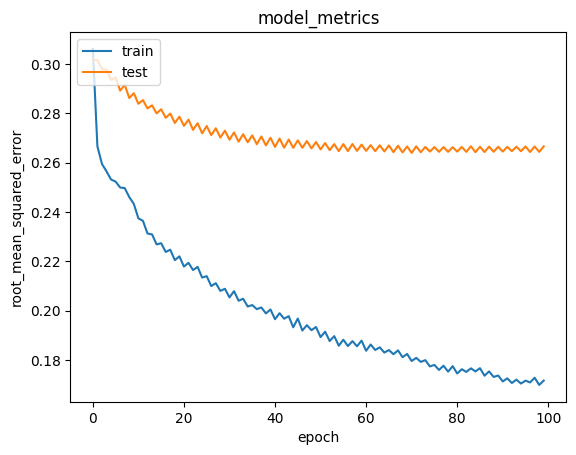

In [ ]:
# menampilkan nilai RMSE dalam bentuk graph atau visualisai

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dari hasil diatas terlihat nilai yang sedikit kurang stabil namun tetap menunjuka trend turun dari RMSE baik dari train dan test. oleh karena itu di dapatai hasil untuk nilai RMSE test sebesar 0.27 dan nilai RMSE train adalah 0.17

## Mendapatkan Rekomendasi Resto

In [ ]:
# pada bagian ini di tujukan untuk melihat dan meastikan data yang akan di gunakan
preparation

movieId                               title  \
0             1                           Toy Story   
215           2                             Jumanji   
325           3                    Grumpier Old Men   
377           4                   Waiting to Exhale   
384           5         Father of the Bride Part II   
...         ...                                 ...   
100849   193581  Black Butler: Book of the Atlantic   
100850   193583               No Game No Life: Zero   
100851   193585                               Flint   
100852   193587        Bungo Stray Dogs: Dead Apple   
100853   193609        Andrew Dice Clay: Dice Rules   

                                             genres tahun_rilis  userId  \
0       Adventure|Animation|Children|Comedy|Fantasy        1995     1.0   
215                      Adventure|Children|Fantasy        1995     6.0   
325                                  Comedy|Romance        1995     1.0   
377                            Comedy|Drama|Romance        1995     6.0   
384                                          Comedy        1995     6.0   
...                                             ...         ...     ...   
100849              Action|Animation|Comedy|Fantasy        2017   184.0   
100850                     Animation|Comedy|Fantasy        2017   184.0   
100851                                        Drama        2017   184.0   
100852                             Action|Animation        2018   184.0   
100853                                       Comedy        1991   331.0   

        rating           timestamp  
0          4.0 2000-07-30 18:45:03  
215        4.0 1996-10-17 11:58:42  
325        4.0 2000-07-30 18:20:47  
377        3.0 1996-10-17 12:12:29  
384        5.0 1996-10-17 12:05:38  
...        ...                 ...  
100849     4.0 2018-09-16 14:44:42  
100850     4.0 2018-09-16 14:52:25  
100851     4.0 2018-09-16 14:56:45  
100852     4.0 2018-09-16 15:00:21  
100853     4.0 2018-09-17 04:13:26  

[9708 rows x 7 columns]

In [ ]:
saringan

id                               judul  \
0          1                           Toy Story   
1          2                             Jumanji   
2          3                    Grumpier Old Men   
3          4                   Waiting to Exhale   
4          5         Father of the Bride Part II   
...      ...                                 ...   
9703  193581  Black Butler: Book of the Atlantic   
9704  193583               No Game No Life: Zero   
9705  193585                               Flint   
9706  193587        Bungo Stray Dogs: Dead Apple   
9707  193609        Andrew Dice Clay: Dice Rules   

                                            genre  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
9703              Action|Animation|Comedy|Fantasy  
9704                     Animation|Comedy|Fantasy  
9705                                        Drama  
9706                             Action|Animation  
9707                                       Comedy  

[9708 rows x 3 columns]

disini kit akan mengambil  data user secara acak dan mendefisnisikan dalam *variable* movie_not_visited

In [ ]:
movie_df = saringan
df = preparation

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
resto_visited_by_user = df[df.userId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movie_not_visited = movie_df[~movie_df['id'].isin(resto_visited_by_user.movieId.values)]['id']
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(films_to_films_encoded.keys()))
)

movie_not_visited = [[films_to_films_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

In [ ]:
# mendapatkan hasil rekomendasi dari  model ini

ratings = model.predict(user_resto_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
   films_encoded_to_films.get(movie_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('film with high ratings from user')
print('----' * 8)

top_resto_user = (
    resto_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_resto_user)]
for row in movie_df_rows.itertuples():
    print(row.judul, ':', row.genre)

print('----' * 8)
print('Top 10 film recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_resto_ids)]
for row in recommended_movie.itertuples():
    print(row.judul, ':', row.genre)

299/299 [==============================] - 0s 1ms/step
Showing recommendations for users: 182.0
film with high ratings from user
--------------------------------
Hate : Crime|Drama
Train of Life : Comedy|Drama|Romance|War
Mystery Train : Comedy|Drama
Open Hearts : Romance
Safety of Objects, The : Drama
--------------------------------
Top 10 film recommendation
--------------------------------
Once Upon a Time in the West : Action|Drama|Western
Blazing Saddles : Comedy|Western
Road Warrior, The : Action|Adventure|Sci-Fi|Thriller
Snatch : Comedy|Crime|Thriller
Pianist, The : Drama|War
Lord of the Rings: The Return of the King, The : Action|Adventure|Drama|Fantasy
WALL·E : Adventure|Animation|Children|Romance|Sci-Fi
Inglourious Basterds : Action|Drama|War
Interstellar : Sci-Fi|IMAX
X-Men: Days of Future Past : Action|Adventure|Sci-Fi
